In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import heapq
import os
from decimal import Decimal
np.set_printoptions(threshold=np.nan) 
home_path = os.getcwd().replace('BC1/notebooks','')
import cPickle as pickle
import pandas as pd
from scipy.signal import find_peaks
import json
import matplotlib.animation as animation
import copy
import matplotlib as mpl
from skimage.measure import compare_ssim as ssim


In [4]:
with open("separate_BC.json", "r") as read_file:
    json_file = json.load(read_file)
name_json = json_file["file_name"]
split = name_json.split('.')
run_number = split[1][2:7]

In [5]:
single_anode_channel = int(json_file["single_anode_channel"])
number_tubes_json = len(json_file["tubes"])
input_name_json = json_file["file_name"]

In [6]:
#opening the file
dictionary_path = home_path+'processed_data/Dados BC1/'
file = open(dictionary_path+input_name_json+'_separate.pkl','rb')
results = pickle.load(file)
#Path to the channel reading mapping file
map_path = home_path+'processed_data/Dados BC1/mapping.txt'

In [7]:
pixel_map = np.loadtxt(map_path)
# nested loop for the grid of pixels
#
for i in range(8):
    for j in range(8):
        if pixel_map[i, j] != 0:
            n=int(pixel_map[i,j]-1)
          
            
            
            plt.figure(figsize=(15,15))
            plt.suptitle("Channels BC1 Pixel "+str(n+1))
            
            plt.subplot(331)
            plt.plot(results["DataB"]["data"][0][:,n])
            plt.plot(results["DataB"]["data"][0][:,2])
            plt.title("Data B Tube 4")

        
            plt.subplot(332)
            plt.plot(results["DataB"]["data"][1][:,n])
            plt.plot(results["DataB"]["data"][1][:,2])
            plt.title("Data B Tube 5")
            
            plt.subplot(333)
            plt.plot(results["DataB"]["data"][2][:,n])
            plt.plot(results["DataB"]["data"][2][:,2])
            plt.title("Data B Tube 6")
            

            plt.subplot(334)
            plt.plot(results["DataC"]["data"][0][:,n])
            plt.plot(results["DataC"]["data"][0][:,2])
            plt.title("Data C Tube 7")
            
            plt.subplot(335)
            plt.plot(results["DataC"]["data"][1][:,n])
            plt.plot(results["DataC"]["data"][1][:,2])
            plt.title("Data C Tube 8")

            plt.subplot(336)
            plt.plot(results["DataC"]["data"][2][:,n])
            plt.plot(results["DataC"]["data"][2][:,2])
            plt.title("Data C Tube 9")
            
            #plt.savefig(home_path+"BC1/analysis/CS10706F/Channels/channel"+str(int(pixel_map[i,j]))+".png", bbox_inches='tight')
            plt.clf()
            


/home/creison/miniconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 432x288 with 0 Axes>

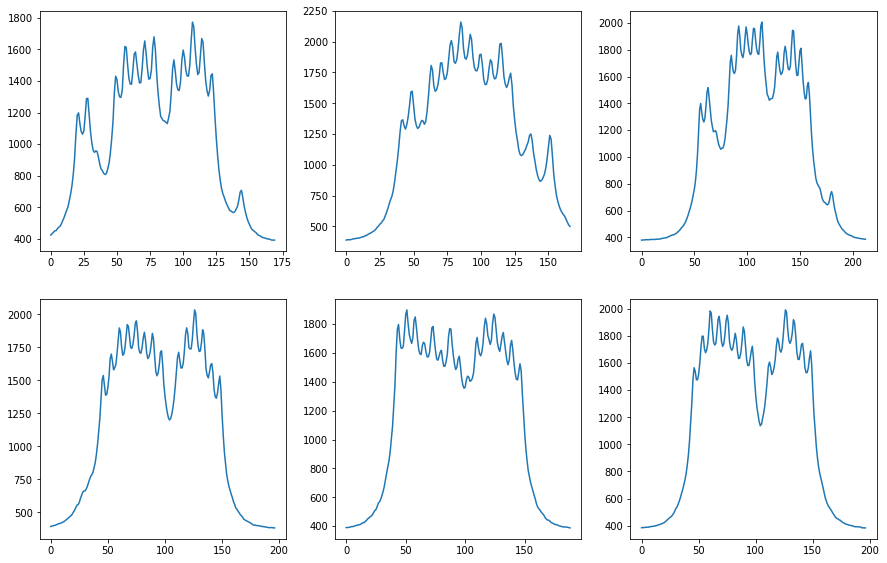

In [8]:
plt.clf()
plt.figure(figsize=(15,15))

plt.subplot(331)
plt.plot(results["DataB"]["data"][0][:,2])

plt.subplot(332)
plt.plot(results["DataB"]["data"][1][:,2])

plt.subplot(333)
plt.plot(results["DataB"]["data"][2][:,2])


plt.subplot(334)
plt.plot(results["DataC"]["data"][0][:,2])

plt.subplot(335)
plt.plot(results["DataC"]["data"][1][:,2])

plt.subplot(336)
plt.plot(results["DataC"]["data"][2][:,2])
plt.show()

In [9]:
def min_max_value(results):
    max_value = None
    min_value = (not None)
    cont = 0
    cells_name = results.keys()
    for name in cells_name:
        for n_tubes in range(3):
            if (max_value < results[name]["tensor"][n_tubes].max() ):
                max_value = results[name]["tensor"][n_tubes].max()
                
            if (min_value > np.sort(results[name]["tensor"][n_tubes], axis=None)[np.sort(results[name]["tensor"][n_tubes], axis=None) !=0][0] or cont==0):
                min_value = np.sort(results[name]["tensor"][n_tubes], axis=None)[np.sort(results[name]["tensor"][n_tubes], axis=None) !=0][0]
                cont+=1
    value = [min_value,max_value]
    return value 

In [10]:
min_max_value = min_max_value(results)

In [11]:
min_max_value

[331.0, 753.0]

In [12]:
def med_value(results):
    max_value = None
    min_value = (not None)
    cont=0
    cells_name = results.keys()
    for name in cells_name:
        contador = 0;
        media = np.zeros(shape=(8,8))
        for n_tubes in range(3):
            for l in range(results[name]["tensor"][n_tubes].shape[2]):
                media += results[name]["tensor"][n_tubes][:,:,l]
                
            contador += results[name]["tensor"][n_tubes].shape[2]            
        media = media/contador
        
        if (max_value < media.max() ):
            max_value = media.max()
        if (min_value > np.sort(media, axis=None)[np.sort(media, axis=None) !=0][0] or cont==0):
            cont+=1
            min_value = np.sort(media, axis=None)[np.sort(media, axis=None) !=0][0]
    
    value = [min_value,max_value]
    return value 

In [13]:
med_value = med_value(results)

In [14]:
med_value

[332.0514579759863, 456.7781818181818]

In [15]:
def generate_images(results,name_json,min_max):
    """
        Private method creating a vector image in a chosen folder
        Only for create image
        
        Args:
        ----
        map_file (str): complete path to where the images will be generated

        Returns:
        Image
        -------
        
    """
    cells_name = results.keys()
    split = name_json.split('.')
    run_number = split[1][2:7]


        #Method to generate the images
    for name in cells_name:
 
        fig, ax = plt.subplots(figsize=(15,15))
        #create colorbar
        rm = plt.cm.ScalarMappable(cmap='jet',norm=plt.Normalize(vmin=min_max[0],vmax=min_max[1]))
        rm._A = []
        cb=plt.colorbar(rm)
        cb.ax.tick_params(labelsize=15)
        tick_locator = ticker.MaxNLocator(nbins=8)
        cb.locator = tick_locator
        cb.update_ticks()
        
        path= home_path+'BC1/analysis/CS'+run_number+'F/separate_cells_BC/'+name
        imagens = []
        for n_tubes in range(1):
            for l in range(results[name]["tensor"][n_tubes].shape[2]):
        
                
                #ma_pmt_image receives array from imported file after passing through "create image"
                ma_pmt_image = results[name]["tensor"][n_tubes][:,:,l]
                

                #Create the image
                im = ax.matshow(ma_pmt_image,cmap='jet' , vmin=min_max[0], vmax=min_max[1])
                X= str(l+1)

                
                #Sets image margins size
                plt.title("# Pixel Map Cell "+name[4]+" Tube "+ str(n_tubes+1) +" Image "+X , fontsize = 25)
                plt.xticks([])
                plt.yticks([])
                plt.xlabel("Pixels X",fontsize=20)
                plt.ylabel("Pixels Y",fontsize=20)
                
                
                imagens.append([im])
                #plt.savefig(path+'/Imagem_Tube_'+ str(n_tubes+1)+'_Image_'+X+'.png', bbox_inches='tight')
                

                
        plt.title("# Pixel Map Cell "+name[4] , fontsize = 25)
        
        animate = animation.ArtistAnimation(fig, imagens, interval=50, blit=True,repeat = False)
        
        path_video = path.replace(name,'')
        
        #animate.save(path_video+"/Video_Tube_"+name+".gif")        
        plt.clf()

        print name 


In [16]:
generate_images(results,input_name_json,min_max_value)

DataC
DataB


<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [17]:
def plot_max_value(results,name_json,min_max):

    cells_name=results.keys()
    lista = np.zeros(shape=(8,8))
    split = name_json.split('.')
    run_number = split[1][2:7]
    for name in cells_name:
        sum_list = np.zeros(shape=(8,8))
        path= home_path+'BC1/analysis/CS'+run_number+'F/separate_cells_BC/'+name
        for n_tubes in range(3):     
            for l in range(results[name]["tensor"][n_tubes].shape[2]):
                
                for i in range(8):
                    for j in range(8):
                        if (lista[i][j] < results[name]["tensor"][n_tubes][:,:,l][i][j]):
                            lista[i][j] = results[name]["tensor"][n_tubes][:,:,l][i][j]
            
          
            #lista2 = (lista - min_max[0])/(min_max[1]-min_max[0])
            lista2 = np.ma.masked_where(lista == 0, lista)
            #Create the image
            fig, ax = plt.subplots(figsize=(15,15))
            #create colorbar
            rm = plt.cm.ScalarMappable(cmap='jet',norm=plt.Normalize(vmin=min_max[0],vmax=min_max[1]))
            rm._A = []
            cb=plt.colorbar(rm)
            cb.ax.tick_params(labelsize=15)
            tick_locator = ticker.MaxNLocator(nbins=8)
            cb.locator = tick_locator
            cb.update_ticks()
            im = ax.matshow(lista2,cmap='jet' , vmin=min_max[0], vmax=min_max[1])
            X= str(l+1)
            
            for (i, j), z in np.ndenumerate(lista2):
                ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')
            
            if (name=="DataB"):
                number=3
            else:
                number=6
            
            #Sets image margins size
            plt.title("# Pixel Map Cell "+ name[4] +" Tube "+ str(number+n_tubes+1), fontsize = 25)
            plt.xticks([])
            plt.yticks([])
            plt.xlabel("Pixels X",fontsize=20)
            plt.ylabel("Pixels Y",fontsize=20)

            plt.savefig(path+'/Image_Cell '+name[4]+' Tube_'+ str(number+n_tubes+1)+'.png', bbox_inches='tight')
            
            sum_list += lista2
              
            
        sum_list = sum_list/3
        sum_list2 = np.ma.masked_where(sum_list == 0, sum_list)
#####################################################################################################        
 
        
        #Create the image average maximums
        fig, ax = plt.subplots(figsize=(15,15))
        #create colorbar
        rm = plt.cm.ScalarMappable(cmap='jet',norm=plt.Normalize(vmin=min_max[0],vmax=min_max[1]))
        rm._A = []
        cb=plt.colorbar(rm)
        cb.ax.tick_params(labelsize=15)
        tick_locator = ticker.MaxNLocator(nbins=8)
        cb.locator = tick_locator
        cb.update_ticks()
        im = ax.matshow(sum_list2, vmin=min_max[0], vmax=min_max[1])
        X= str(l+1)
            
        for (i, j), z in np.ndenumerate(sum_list2):
            ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')
            
            
        #Sets image margins size
        plt.title("# Pixel Map Average Maximums Cell "+ name[4], fontsize = 25)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel("Pixels X",fontsize=20)
        plt.ylabel("Pixels Y",fontsize=20)

        plt.savefig(path+'/Image_Average_Maximums_Cell'+name[4]+'.png', bbox_inches='tight')
        plt.clf()   # Clear figure

        

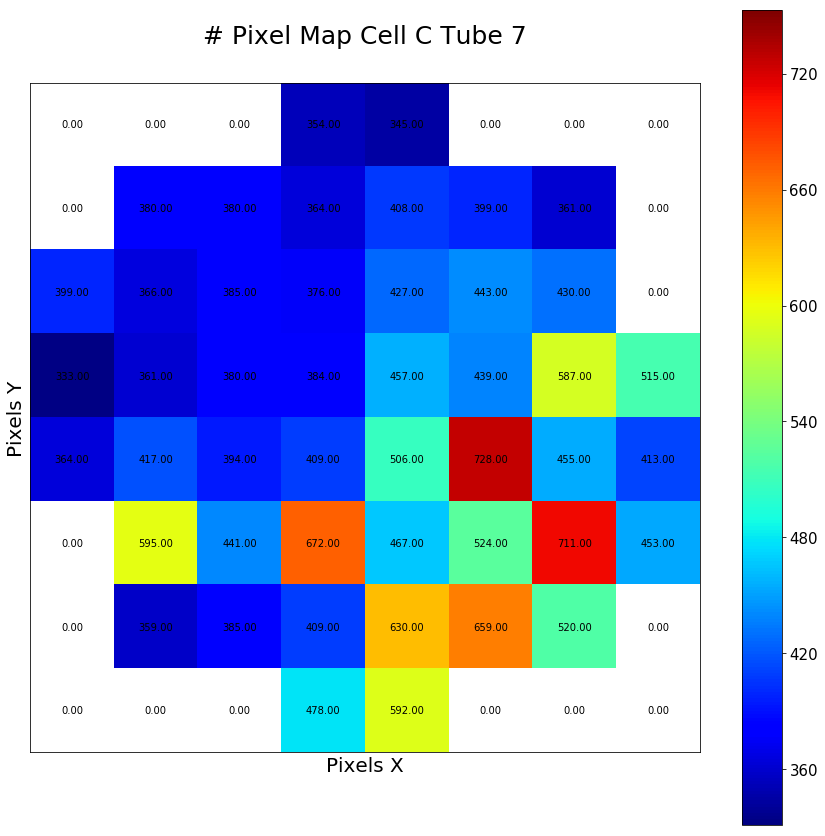

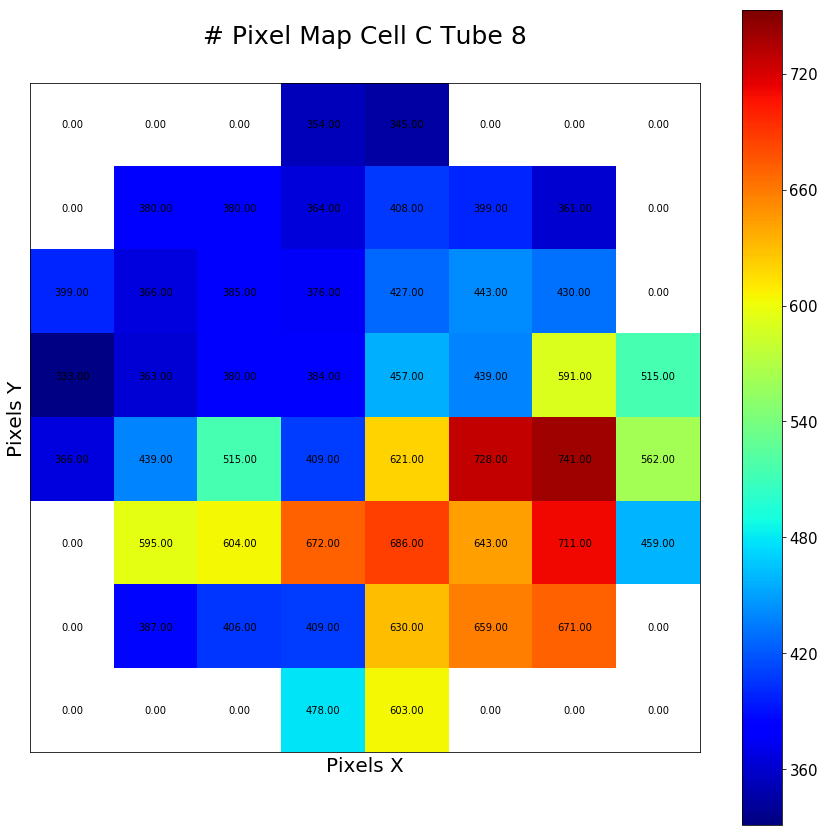

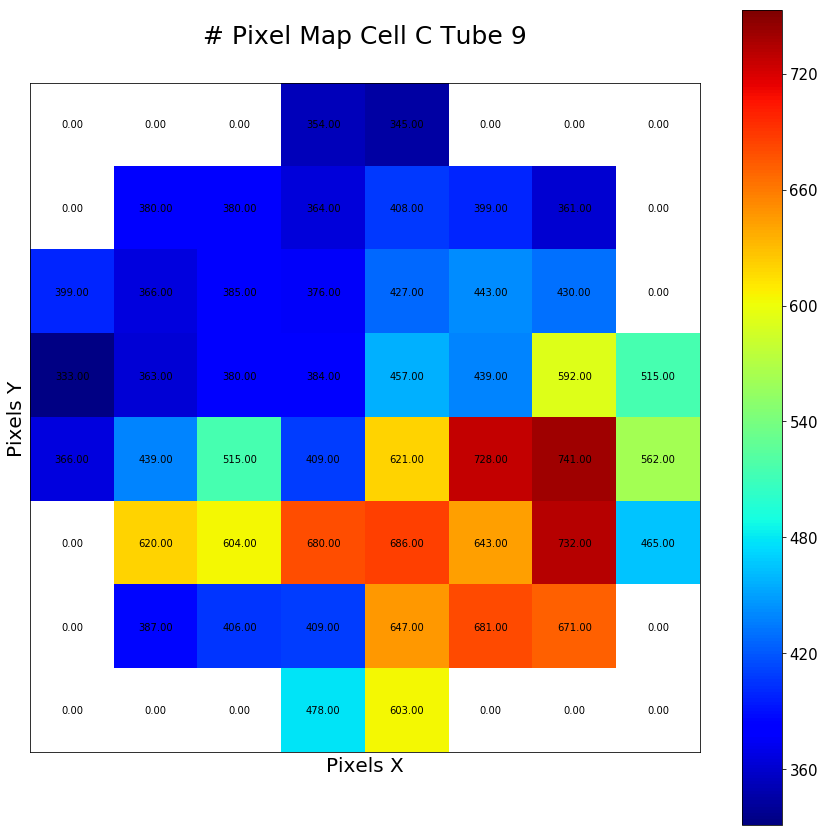

<Figure size 1080x1080 with 0 Axes>

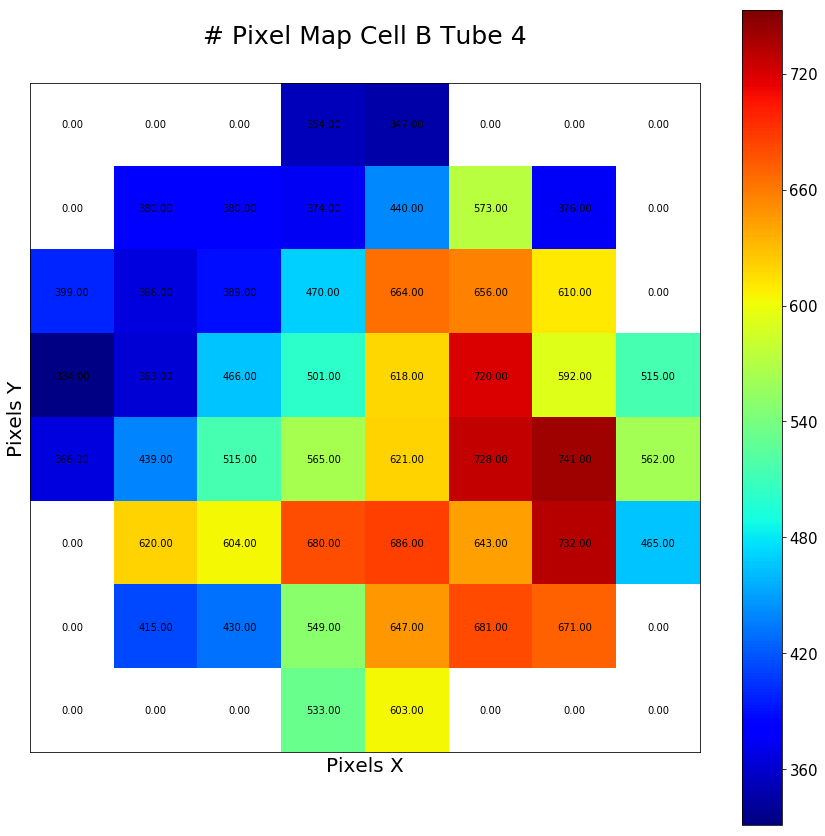

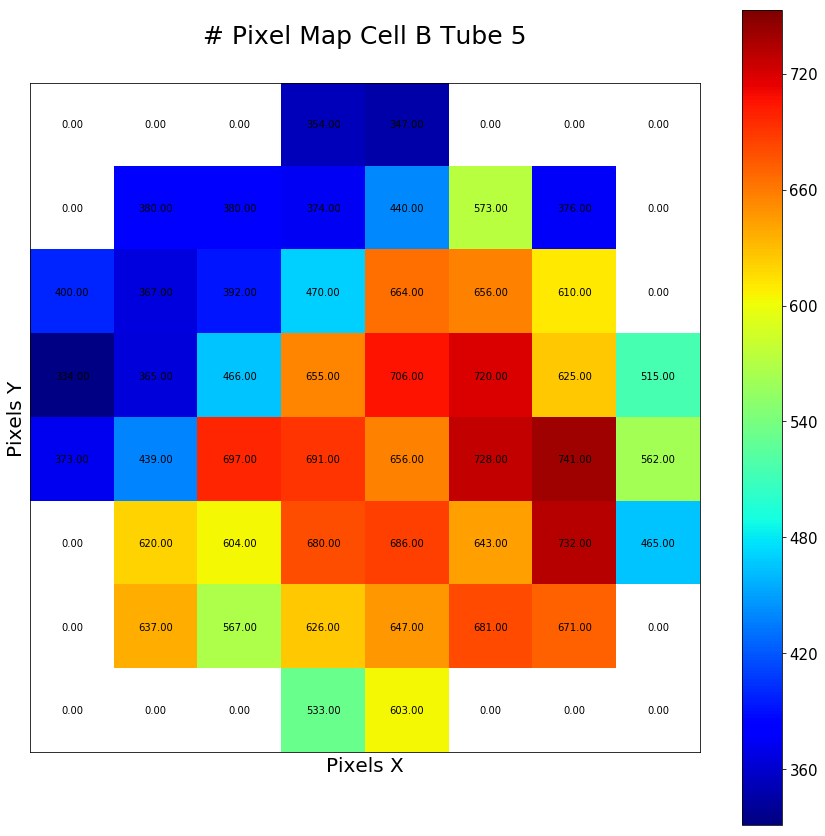

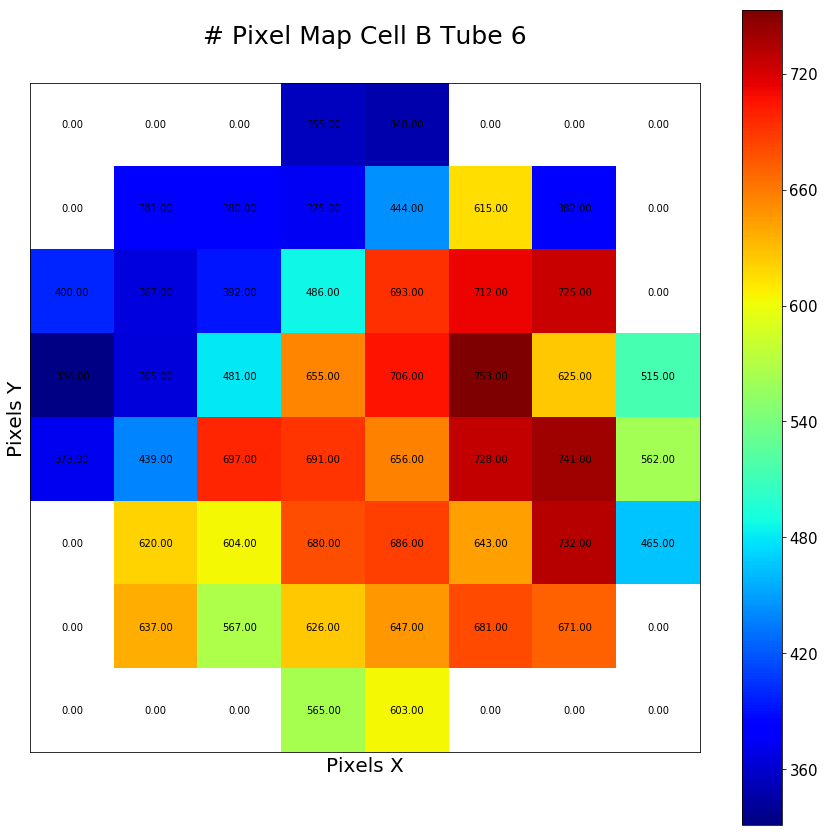

<Figure size 1080x1080 with 0 Axes>

In [18]:
plot_max_value(results,input_name_json,min_max_value)

In [19]:
def plot_mean_global(results,name_json,med_value):
    
    
    
    lista = np.zeros(shape=(8,8))
    split = name_json.split('.')
    run_number = split[1][2:7]  
    
    cells_name = results.keys()
    median = np.zeros(shape=(8,8))
    
    for name in cells_name:
        
        media = np.zeros(shape=(8,8))
        contador = 0
        

        path= home_path+'BC1/analysis/CS'+run_number+'F/separate_cells_BC/'+name
        
        for n_tubes in range(3):
        
            for l in range(results[name]["tensor"][n_tubes].shape[2]):
                media += results[name]["tensor"][n_tubes][:,:,l]
                
            contador += results[name]["tensor"][n_tubes].shape[2]
    

  
        media = media/contador
        #media2= (media - med_value[0])/(med_value[1]-med_value[0])
        media2 = np.ma.masked_where(media == 0, media)
        median = np.dstack((median, media))
        
#####################################################################################################        
        #Create the image global mean
        fig, ax = plt.subplots(figsize=(15,15))
        #create colorbar
        rm = plt.cm.ScalarMappable(cmap='jet',norm=plt.Normalize(vmin=med_value[0],vmax=med_value[1]))
        rm._A = []
        cb=plt.colorbar(rm)
        cb.ax.tick_params(labelsize=15)
        tick_locator = ticker.MaxNLocator(nbins=8)
        cb.locator = tick_locator
        cb.update_ticks()
        im = ax.matshow(media2,cmap='jet' , vmin=med_value[0], vmax=med_value[1])
        X= str(l+1)
            
        for (i, j), z in np.ndenumerate(media2):
            ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')
            
            
        #Sets image margins size
        plt.title("# Pixel Map Global Mean Cell "+ name[4], fontsize = 25)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel("Pixels X",fontsize=20)
        plt.ylabel("Pixels Y",fontsize=20)

        plt.savefig(path+'/Image_Global_Mean_Cell'+name[4]+'.png', bbox_inches='tight')
    
    return median

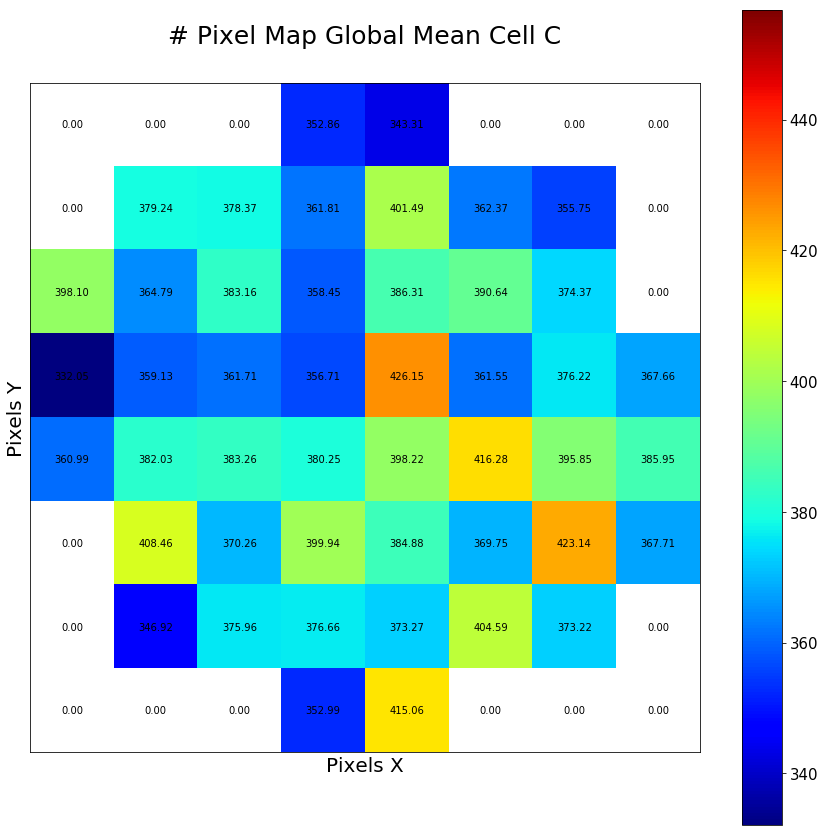

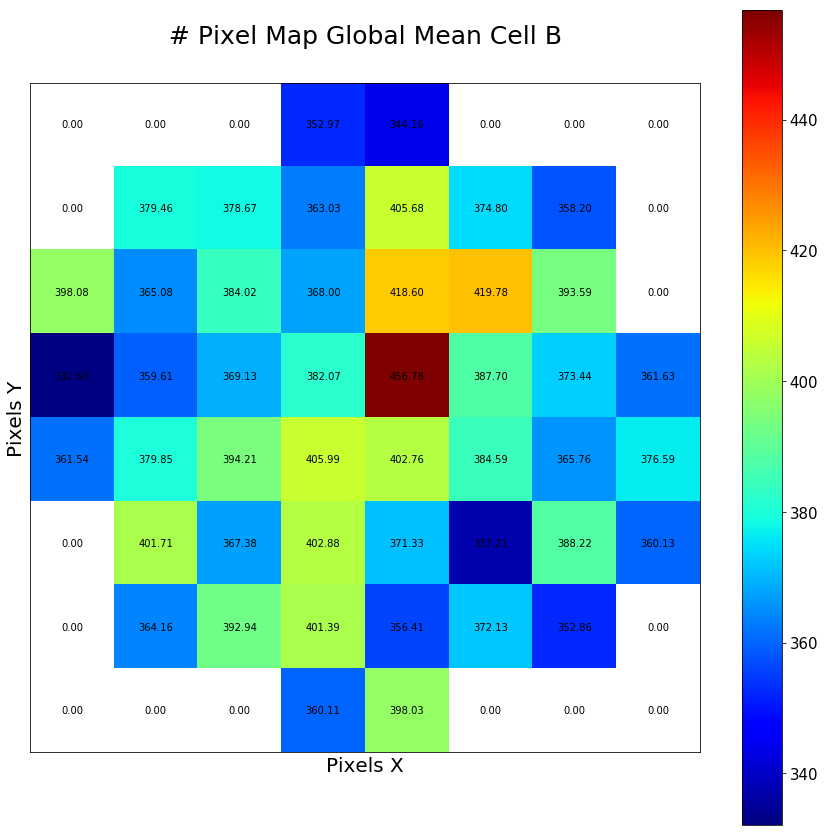

In [20]:
t=plot_mean_global(results,input_name_json,med_value)

In [21]:
path= home_path+'BC1/analysis/CS'+run_number+'F/separate_cells_BC/'

In [22]:
def compare_images(imageA, imageB , path = path,med_value=med_value):
    # compute the mean squared error and structural similarity
    # index for the images
    #m = mse(imageA, imageB)
    s = ssim(imageA, imageB, multichannel = True)

    imageA2 = np.ma.masked_where(imageA == 0, imageA)
    imageB2 = np.ma.masked_where(imageB == 0, imageB)
    # setup the figure
    fig = plt.figure(figsize=(25, 15))
    plt.title("# DataB vs. DataC ", fontsize = 25)
    plt.axis("off")
    #plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s), fontsize = 15)
    plt.suptitle("SSIM: %.2f" % (s), fontsize = 15)
    
    # show first image
    fig.add_subplot(1, 2, 1)
    plt.imshow(imageA2, cmap = 'jet',vmin=med_value[0], vmax=med_value[1])
    plt.colorbar()
    for (i, j), z in np.ndenumerate(imageA2):
        plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')
    plt.axis("off")
    
    # show the second image
    fig.add_subplot(1, 2, 2)
    plt.imshow(imageB2, cmap = 'jet',vmin=med_value[0], vmax=med_value[1])
    plt.colorbar()
    for (i, j), z in np.ndenumerate(imageB2):
        plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')
    plt.axis("off")

    
    

    plt.savefig(path+'compare_images_ssim.png', bbox_inches='tight')
    # show the images

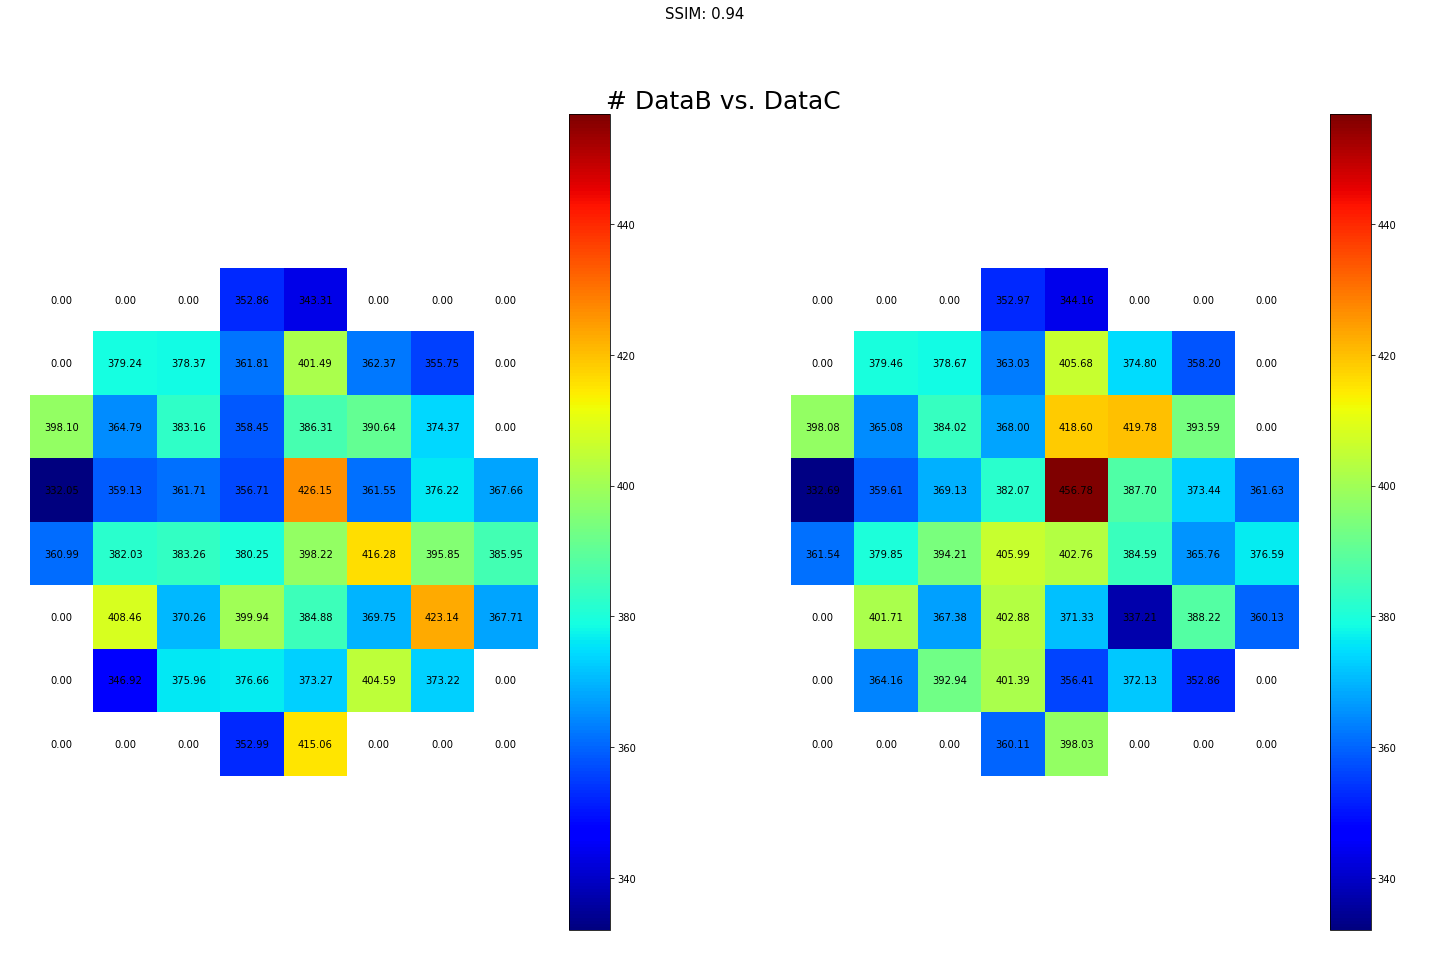

In [38]:
compare_images(t[:,:,1],t[:,:,2])

In [45]:
score, diff = ssim(t[:,:,1], t[:,:,2], full=True,  multichannel=True,data_range=med_value[1]-med_value[0])
print("SSIM: {}".format(score))

SSIM: 0.942693309675


In [46]:
diff

array([[1.   , 1.   , 1.   , 0.335, 0.907, 0.996, 0.998, 1.   ],
       [1.   , 1.   , 1.   , 0.697, 0.925, 0.994, 0.997, 1.   ],
       [1.   , 1.   , 1.   , 0.836, 0.893, 0.991, 0.994, 1.   ],
       [1.   , 0.999, 0.999, 0.81 , 0.831, 0.982, 0.99 , 1.   ],
       [1.   , 0.999, 0.999, 0.825, 0.68 , 0.982, 0.99 , 1.   ],
       [1.   , 0.999, 0.999, 0.864, 0.648, 0.989, 0.994, 1.   ],
       [1.   , 0.999, 0.999, 0.85 , 0.805, 0.991, 0.995, 1.   ],
       [1.   , 0.998, 0.999, 0.856, 0.916, 0.993, 0.994, 1.   ]])